<a href="https://colab.research.google.com/github/Zhangmingyang-Su/Machine-Learning-Project/blob/master/bank_customer_churn_prediction_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Prediction and Analysis

In this project, we implement supervised learning models to discover customers who are likely to churn in the future. Futhermore, we will analyze top factors that influence user retention. [Dataset information](https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation).

## Main Contents

* [Part 0: Setup Google Drive Environment](#Part-0:-Setup-Google-Drive-Environment)
* [Part 1: Data Exploration and Analysis](#Part-1:-Data-Exploration-and-Analysis)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Feature Selection](#Part-4:-Feature-Selection)


# Part 0: Setup Google Drive Environment


In [0]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=10lNCsDu5Tid0r_2uvvcMaGSJS3JQvsrc'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
file.GetContentFile('bank-churn-prediction.csv')

In [0]:
import pandas as pd

df = pd.read_csv('bank-churn-prediction.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Part 1: Data Exploration

### Part 1.1: Discover the Dataset Information

In [0]:
import pandas as pd
import numpy as np

churn_df = pd.read_csv('bank-churn-prediction.csv')

In [0]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
# check data dimension information
print ("Num of rows: " + str(churn_df.shape[0])) 
print ("Num of columns: " + str(churn_df.shape[1]))

Num of rows: 10000
Num of columns: 14


In [0]:
# check data overall info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
# check the unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [0]:
# Get target variable(churn = 1)
y = churn_df['Exited']

In [0]:
# check the propotion of y = 1
print(y.sum() / y.shape * 100)

[20.37]


### Part 1.2:  Analyze the features

In [0]:
# check all the missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
# understand continuous feature
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [0]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

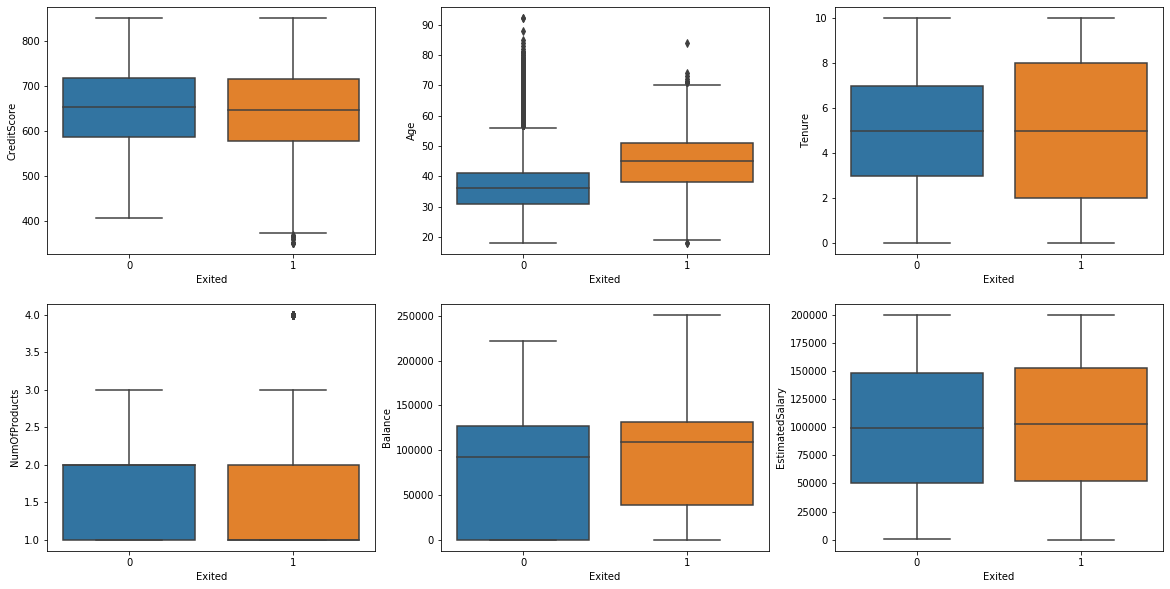

In [0]:
# boxplot for continuous feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

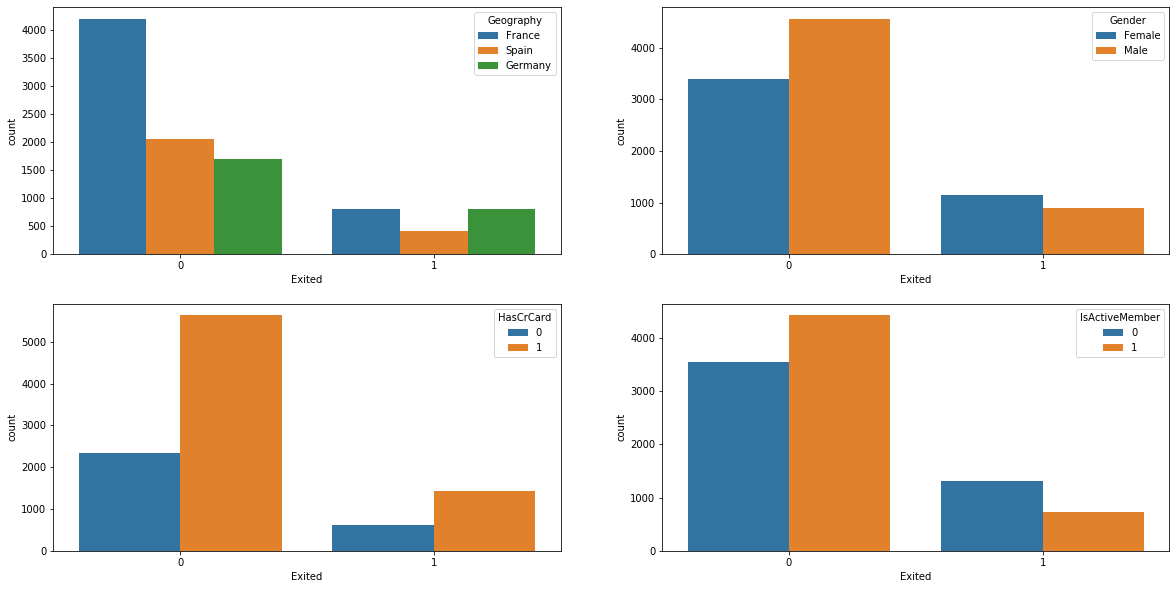

In [0]:
# understand categorical feature
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

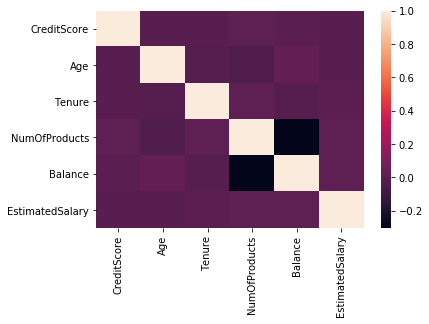

In [0]:
# correlations between features
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(corr_score)

In [0]:
# check the actual values of correlations
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


# Part 2: Feature Preprocessing



In [0]:
# ordinal encoding
churn_df['Gender'] = churn_df['Gender'] == 'Female'

In [0]:
churn_df = pd.get_dummies(churn_df, columns=['Geography'], drop_first=True)

In [0]:
churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,True,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1
5,6,15574012,Chu,645,False,44,8,113755.78,2,1,0,149756.71,1,0,1
6,7,15592531,Bartlett,822,False,50,7,0.00,2,1,1,10062.80,0,0,0
7,8,15656148,Obinna,376,True,29,4,115046.74,4,1,0,119346.88,1,1,0
8,9,15792365,He,501,False,44,4,142051.07,2,0,1,74940.50,0,0,0
9,10,15592389,H?,684,False,27,2,134603.88,1,1,1,71725.73,0,0,0


In [0]:
# Get feature space by dropping insignificant feature
drop_columns = ['RowNumber','CustomerId','Surname', 'Exited']
X = churn_df.drop(drop_columns, axis=1)

In [0]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,1


# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset and Standardization

In [0]:
# Splite data into training and testing
from sklearn import model_selection

# remain 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 11 features
test data has 2500 observation with 11 features


In [0]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Part 3.2: Model Training and Selection

In [0]:
#@title build machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression
classifier_Logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# SVM
classifier_SVC = SVC()

In [0]:
# Train the model
classifier_Logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Prediction of test data
classifier_Logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
# Accuracy of test data
classifier_Logistic.score(X_test, y_test)

0.8108

In [0]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest', 'SVM']
model_list = [classifier_Logistic, classifier_KNN, classifier_RF, classifier_SVC]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.81066667 0.81933333 0.80733333 0.81266667 0.80933333]
Model accuracy of Logistic Regression is 0.8118666666666666
[0.83933333 0.82866667 0.83       0.83333333 0.81866667]
Model accuracy of KNN is 0.8300000000000001
[0.86666667 0.86266667 0.86266667 0.862      0.85133333]
Model accuracy of Random Forest is 0.8610666666666666
[0.852      0.85933333 0.85666667 0.858      0.85466667]
Model accuracy of SVM is 0.8561333333333334


### Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [0]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [0]:
# Potential hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.1, 1, 3, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
# the best regularization and hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.8126666666666666
Best parameters set:
C:0.1
penalty:l1


In [0]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [0]:
# Potential hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9,11,20] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5, scoring='recall')
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [0]:
# the best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.45865185504745465
Best parameters set:
n_neighbors:1


In [0]:
# best model
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [0]:
# Potential hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80,100,120]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

In [0]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8618666666666666
Best parameters set:
n_estimators:120


In [0]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

#### Part 3.3.4: Find Optimal Hyperparameters: SVM

In [0]:
# Potential hyperparamter options for SVM
# defining parameter range
parameters = {
    'C': [0.1, 1], 
    'gamma': [1, 0.1],
    'kernel': ['rbf']}
Grid_SVM = GridSearchCV(SVC(), parameters, refit= True, verbose= 3, cv=5)
Grid_SVM.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.797, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.797, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.797, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.797, total=   2.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.797, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.829, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.829, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.826, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.835, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   31.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [0]:
# best hyperparameters
print_grid_search_metrics(Grid_SVM)

Best score: 0.8558666666666666
Best parameters set:
C:1
gamma:0.1
kernel:rbf


In [0]:
# best SVM model
best_SVM_model = Grid_SVM.best_estimator_

####Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.8612
precision is: 0.7660256410256411
recall is: 0.46588693957115007


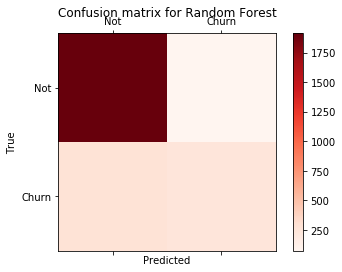

Logistic Regression
Accuracy is: 0.8112
precision is: 0.615819209039548
recall is: 0.2124756335282651


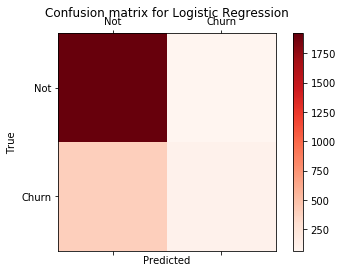

SVM
Accuracy is: 0.8536
precision is: 0.7816091954022989
recall is: 0.39766081871345027


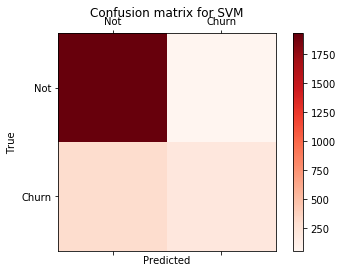

K nearest neighbor
Accuracy is: 0.7992
precision is: 0.5120350109409191
recall is: 0.45614035087719296


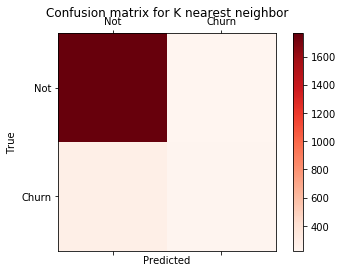

In [0]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("SVM", confusion_matrix(y_test,best_SVM_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier, SVC and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF Model

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [0]:
best_RF_model.predict_proba(X_test)

array([[0.93333333, 0.06666667],
       [1.        , 0.        ],
       [0.7       , 0.3       ],
       ...,
       [0.94166667, 0.05833333],
       [0.75      , 0.25      ],
       [0.95      , 0.05      ]])

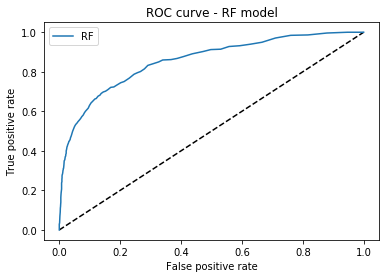

In [0]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [0]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8549372088163707

#### Part 3.4.2: ROC of LR Model

In [0]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr= best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

In [0]:
best_LR_model.predict_proba(X_test)

array([[0.72472889, 0.27527111],
       [0.91850462, 0.08149538],
       [0.81275449, 0.18724551],
       ...,
       [0.9730555 , 0.0269445 ],
       [0.64814683, 0.35185317],
       [0.90586179, 0.09413821]])

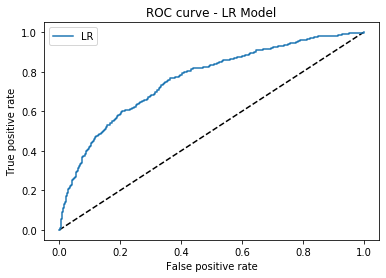

In [0]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [0]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7612414416906774

# Part 4: Feature Importance

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

In [0]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X)
Logistic_l1 = LogisticRegression(penalty="l1", C = 0.01, solver='liblinear')
Logistic_l1.fit(X_l1, y)
print ("Logistic Regression (L1) Coefficients")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(Logistic_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.6469
IsActiveMember : -0.4191
Geography_Germany : 0.2719
Gender : 0.1802
Balance : 0.1133
CreditScore : 0.0
NumOfProducts : -0.0029
Tenure : 0.0
EstimatedSalary : 0.0
HasCrCard : 0.0
Geography_Spain : 0.0


In [0]:
np.argsort(abs(Logistic_l1.coef_[0]))[::-1]

array([ 2,  7,  9,  1,  4,  5, 10,  8,  6,  3,  0])

In [0]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X)
Logistic_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
Logistic_l2.fit(X_l2, y)
Logistic_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for index in range(X.shape[1]):
  print ("{} : {}".format(X.columns[indices[index]],round(Logistic_l2.coef_[0][indices[index]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.7509
IsActiveMember : -0.5271
Geography_Germany : 0.3313
Gender : 0.2591
Balance : 0.1624
CreditScore : -0.0637
NumOfProducts : -0.0585
Tenure : -0.0452
EstimatedSalary : 0.0272
HasCrCard : -0.0199
Geography_Spain : 0.0139


In [0]:
np.argsort(abs(Logistic_l2.coef_[0]))[::-1]

array([ 2,  7,  9,  1,  4,  0,  5,  3,  8,  6, 10])

### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [0]:
# check feature importance of random forest for feature selection
random_forest = RandomForestClassifier()
random_forest.fit(X, y)
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for index in range(X.shape[1]):
  print ("{} : {}".format(X.columns[indices[index]],round(importances[indices[index]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2399
EstimatedSalary : 0.1477
CreditScore : 0.144
Balance : 0.1432
NumOfProducts : 0.1296
Tenure : 0.0816
IsActiveMember : 0.0402
Geography_Germany : 0.0251
HasCrCard : 0.0178
Gender : 0.0173
Geography_Spain : 0.0134
